### Practical No. 8

Epoch 0, Loss: 15.0075
Epoch 50, Loss: 0.3099
Epoch 100, Loss: 0.4866
Epoch 150, Loss: 0.4489
Epoch 200, Loss: 0.3846
Epoch 250, Loss: 0.2611
Epoch 300, Loss: 0.0765
Epoch 350, Loss: 0.0762
Epoch 400, Loss: 0.0760
Epoch 450, Loss: 0.0759


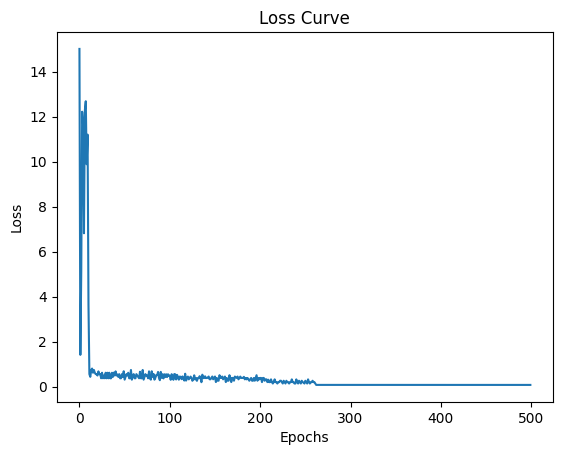


Predictions for test points: [0 1 2]


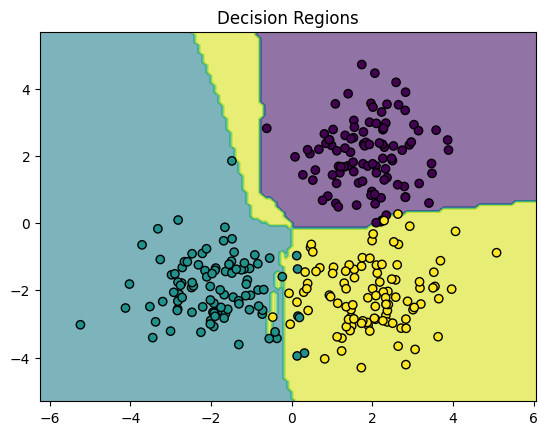

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X1 = np.random.randn(100, 2) + np.array([2, 2])
X2 = np.random.randn(100, 2) + np.array([-2, -2])
X3 = np.random.randn(100, 2) + np.array([2, -2])

X = np.vstack([X1, X2, X3])
y = np.array([0] * 100 + [1] * 100 + [2] * 100)
Y = np.zeros((y.size, 3))

Y[np.arange(y.size), y] = 1

input_size = 2
hidden_size = 100
output_size = 3
learning_rate = 0.01

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(predictions, targets):
    return -np.sum(targets * np.log(predictions + 1e-8)) / targets.shape[0]

epochs = 500
losses = []

for epoch in range(epochs):
    hidden_layer = relu(np.dot(X, W1) + b1)
    output_layer = softmax(np.dot(hidden_layer, W2) + b2)
    
    loss = cross_entropy_loss(output_layer, Y)
    losses.append(loss)
    
    output_error = output_layer - Y
    hidden_error = np.dot(output_error, W2.T) * (hidden_layer > 0)
    W2 -= learning_rate * np.dot(hidden_layer.T, output_error)
    b2 -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
    W1 -= learning_rate * np.dot(X.T, hidden_error)
    b1 -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

def predict(X_input):
    hidden_layer = relu(np.dot(X_input, W1) + b1)
    output_layer = softmax(np.dot(hidden_layer, W2) + b2)
    return np.argmax(output_layer, axis=1)

test_points = np.array([[1, 1], [-1, -1], [3, -3]])
predictions = predict(test_points)
print("\nPredictions for test points:", predictions)

h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.title("Decision Regions")
plt.show()